In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
city_file_to_load = 'Resources/city_data.csv'
ride_file_to_load = 'Resources/ride_data.csv'

city_data_df = pd.read_csv(city_file_to_load)
ride_data_df = pd.read_csv(ride_file_to_load)

In [3]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [5]:
print(city_data_df.isnull().sum(),'\n=====\n')
print(ride_data_df.isnull().sum())

city            0
driver_count    0
type            0
dtype: int64 
=====

city       0
date       0
fare       0
ride_id    0
dtype: int64


In [6]:
print(city_data_df.dtypes,'\n=====\n')
print(ride_data_df.dtypes)

city            object
driver_count     int64
type            object
dtype: object 
=====

city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [7]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
print(f"There are {sum(city_data_df['type']=='Urban')} in Urban Cities,\n{sum(city_data_df['type']=='Suburban')} in Suburban neighborhoods,and \n{sum(city_data_df['type']=='Rural')} in towns")

There are 66 in Urban Cities,
36 in Suburban neighborhoods,and 
18 in towns


In [9]:
pyber_data_df = pd.merge(ride_data_df,city_data_df,how = 'left',on = ['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [10]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']

In [11]:
#x-axis total rides per city 

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [12]:
#y-axis Average Rides

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [13]:
#Area of datapoint
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

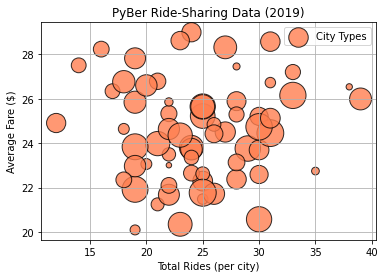

In [14]:
plt.scatter(urban_ride_count,urban_avg_fare,
            s=10*urban_driver_count,c='coral',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

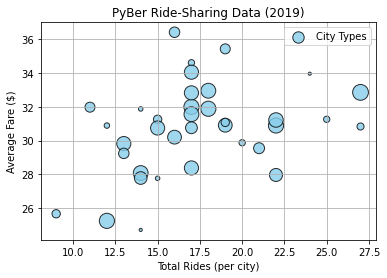

In [15]:
plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count,c='skyblue',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

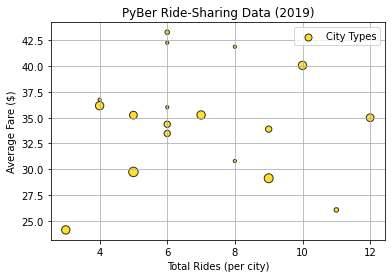

In [16]:
plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count,c='gold',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

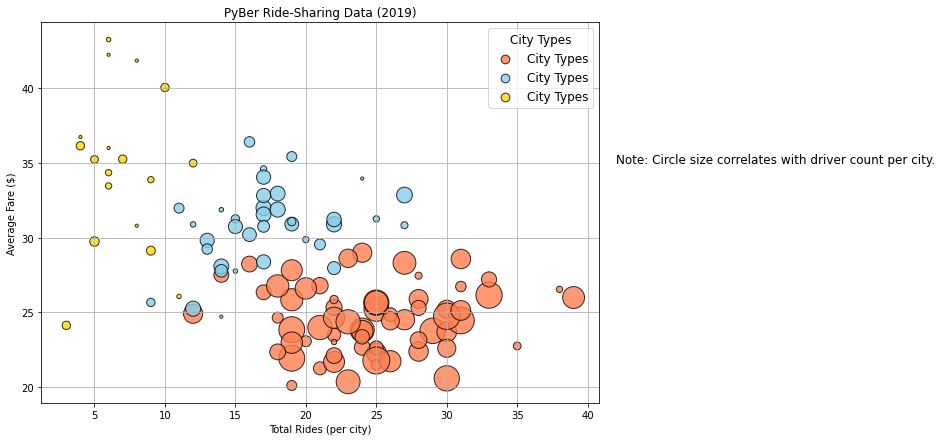

In [17]:
plt.subplots(figsize=(10,7))
plt.scatter(urban_ride_count,urban_avg_fare,
            s=10*urban_driver_count,c='coral',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')

plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count,c='skyblue',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')

plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count,c='gold',
            edgecolor='black',linewidths=1,
            alpha=0.8,label = 'City Types')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
lgnd = plt.legend(fontsize='12',mode='Expanded',
                 scatterpoints=1,loc='best',title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.savefig("analysis/Fig1.png")

plt.show()



In [18]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [19]:
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [20]:
suburban_ride_count.mode()

0    17
dtype: int64

In [21]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [22]:
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']

In [23]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.\n=====\n")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.\n=====\n")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
=====

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).
=====

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [24]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [25]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean drivers for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median drivers price for urban cities trips is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers price for urban cities trips is {mode_urban_drivers}.\n=====\n")

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean drivers price for suburban cities trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median drivers price for suburban cities trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers price for suburban cities is {mode_suburban_drivers}.\n=====\n")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean drivers price for rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median drivers price for rural cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers price for rural cities is {mode_rural_drivers}.")

The mean drivers for urban cities is 36.68.
The median drivers price for urban cities trips is 37.00.
The mode drivers price for urban cities trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).
=====

The mean drivers price for suburban cities trips is 13.71.
The median drivers price for suburban cities trips is 16.00.
The mode drivers price for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).
=====

The mean drivers price for rural cities is 4.30.
The median drivers price for rural cities is 4.00.
The mode drivers price for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


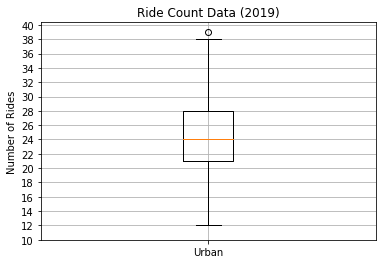

In [26]:
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count,labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

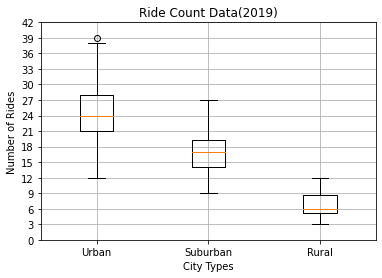

In [27]:
x_labels = ['Urban','Suburban','Rural']
fig, ax = plt.subplots()
ride_count_data = [urban_ride_count,suburban_ride_count,rural_ride_count]
ax.boxplot(ride_count_data,labels = x_labels)
ax.set_title('Ride Count Data(2019)')
ax.set_xlabel('City Types')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig('analysis/Fig2.png')
plt.show()

In [28]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


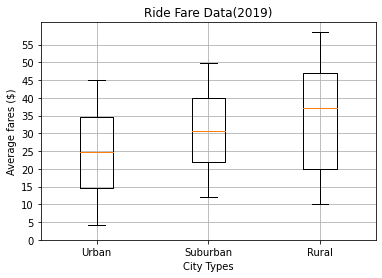

In [29]:
x_labels = ['Urban','Suburban','Rural']
fig, ax = plt.subplots()
average_fare_data = [urban_fares,suburban_fares,rural_fares]
ax.boxplot(average_fare_data, labels = x_labels)
ax.set_xlabel('City Types')
ax.set_ylabel('Average fares ($)')
ax.set_yticks(np.arange(0,60,5))
ax.set_title('Ride Fare Data(2019)')
ax.grid()
plt.savefig('analysis/Fig3.png')
plt.show()

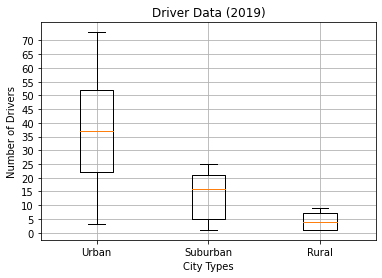

In [30]:
x_labels = ['Urban','Suburban','Rural']
fig, ax = plt.subplots()
driver_count_data = [urban_drivers,suburban_drivers,rural_drivers]
ax.boxplot(driver_count_data, labels = x_labels)
ax.set_title('Driver Data (2019)')
ax.set_xlabel('City Types')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0,75,step=5.0))
ax.grid()
plt.show()

In [31]:
total_fares = pyber_data_df["fare"].sum()
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

type_percents = sum_fares_by_type/total_fares *100
print(f'Total Fares=  {total_fares}','\n=====\n')
print('City Type Percent of total fares \n',type_percents)

Total Fares=  63538.64 
=====

City Type Percent of total fares 
 type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


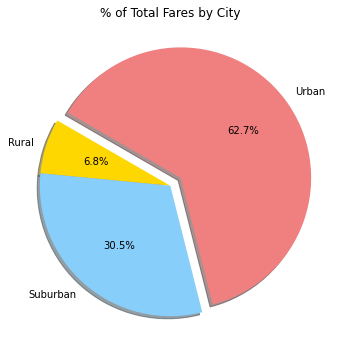

In [32]:
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels = ['Rural','Suburban','Urban'],
        colors = ['gold','lightskyblue','lightcoral'],
        explode = [0,0,0.1],
       autopct='%1.1f%%',
       shadow = True,startangle=150)
plt.title('% of Total Fares by City')
mpl.rcParams['font.size'] = 14
plt.savefig('analysis/Fig5.png')
plt.show()

In [35]:
ride_percents = (pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()) *100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

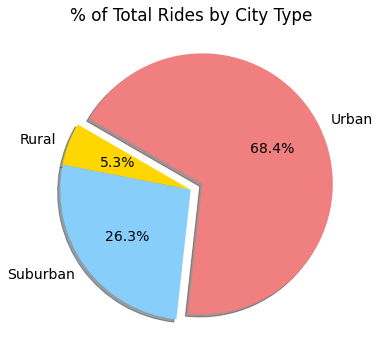

In [36]:
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig6.png")
plt.show()

In [41]:
driver_percents = (city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum())*100
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

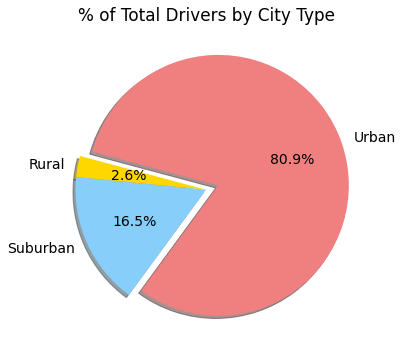

In [42]:
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig7.png")
plt.show()